In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import torch
import torch.nn as nn
from tqdm.notebook import tqdm
import torch.nn.functional as F
import torch.optim as optim
import csv

In [2]:
filename = 'food_c101_n10099_r64x64x3.h5'
# filename = 'food_c101_n1000_r384x384x3.h5'

with h5py.File(filename, 'r') as f:

    print("{} keys: {}".format(filename, f.keys()))

    one_hot_vectors = f['category'][()]
    byte_class_names = f['category_names'][()]
    imgs_int = f['images'][()]

food_c101_n10099_r64x64x3.h5 keys: <KeysViewHDF5 ['category', 'category_names', 'images']>


In [3]:
with open('upper_class.csv', 'r') as file:
    csv_reader = csv.reader(file)
    class_to_upper_class_dict = {line[0]: line[1].strip() for line in csv_reader}

In [4]:
upper_class_to_idx_dict = {upper_class: i for (i, upper_class) in enumerate(set(class_to_upper_class_dict.values()))}

super_class_names = list(upper_class_to_idx_dict.keys())

print(upper_class_to_idx_dict)

{'dumpling': 0, 'taco': 1, 'plate': 2, 'bread': 3, 'salad': 4, 'meat': 5, 'shell': 6, 'egg': 7, 'sauce': 8, 'sandwich': 9, 'etc': 10, 'pasta': 11, 'fish': 12, 'icecream': 13, 'desert': 14, 'fries': 15, 'noodle': 16, 'soup': 17, 'cake': 18, 'bap': 19}


In [5]:
idx_tokens = [np.argwhere(vector==True)[0, 0] for vector in one_hot_vectors]

class_names = [class_name.decode('utf-8') for class_name in byte_class_names]

upper_idx_tokens = [upper_class_to_idx_dict[class_to_upper_class_dict[class_names[token]]] for token in idx_tokens]

imgs = imgs_int / 255

In [6]:
print('(data_num, class_num) = {}\n'.format(one_hot_vectors.shape))

print('[ Class ]\n{}\n'.format(class_names))

print('(data_num, x, y, colors) = {}'.format(imgs.shape))

(data_num, class_num) = (10099, 101)

[ Class ]
['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwic

In [7]:
print('One Hot Vector')
print(one_hot_vectors[0])
print()
print('Index Token')
print('True @ {}'.format(idx_tokens[0]))
print()
print('Class #{} is [{}]'.format(idx_tokens[0], class_names[idx_tokens[0]]))

One Hot Vector
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]

Index Token
True @ 33

Class #33 is [edamame]


[ Index: 	                  494 ]
[ Class: 	                tacos ]
[ Upper Class: 	                 taco ]


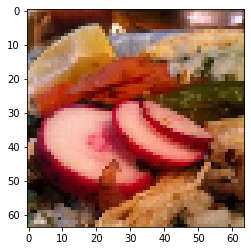

[ Index: 	                 1288 ]
[ Class: 	    hot_and_sour_soup ]
[ Upper Class: 	                 soup ]


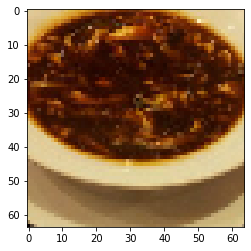

[ Index: 	                 2025 ]
[ Class: 	                steak ]
[ Upper Class: 	                 meat ]


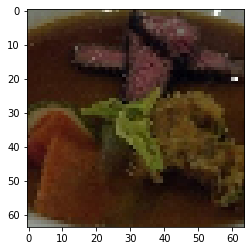

[ Index: 	                 2150 ]
[ Class: 	       lobster_bisque ]
[ Upper Class: 	                 soup ]


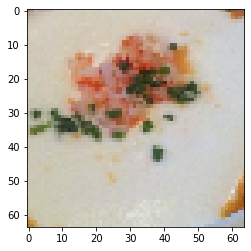

[ Index: 	                 2290 ]
[ Class: 	              churros ]
[ Upper Class: 	                bread ]


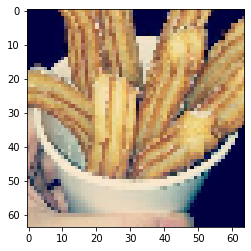

[ Index: 	                 2455 ]
[ Class: 	                pizza ]
[ Upper Class: 	                  etc ]


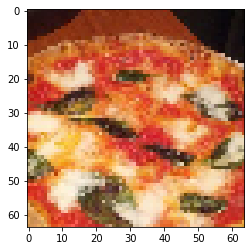

[ Index: 	                 2526 ]
[ Class: 	        frozen_yogurt ]
[ Upper Class: 	             icecream ]


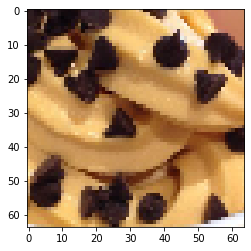

[ Index: 	                 2833 ]
[ Class: 	  spaghetti_carbonara ]
[ Upper Class: 	               noodle ]


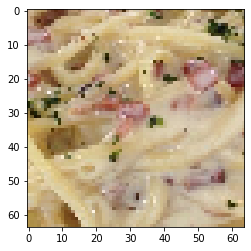

[ Index: 	                 3173 ]
[ Class: 	         beef_tartare ]
[ Upper Class: 	                plate ]


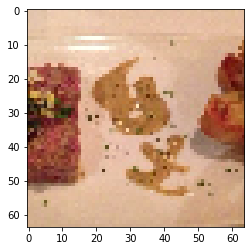

[ Index: 	                 3655 ]
[ Class: 	              edamame ]
[ Upper Class: 	                salad ]


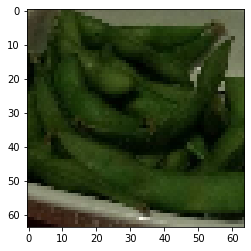

[ Index: 	                 3723 ]
[ Class: 	               nachos ]
[ Upper Class: 	                 taco ]


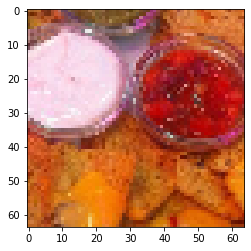

[ Index: 	                 4350 ]
[ Class: 	         french_toast ]
[ Upper Class: 	                bread ]


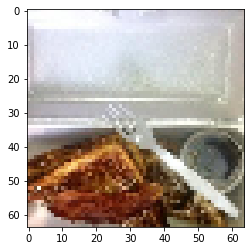

[ Index: 	                 4540 ]
[ Class: 	       baby_back_ribs ]
[ Upper Class: 	                 meat ]


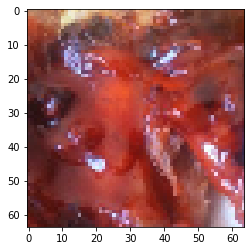

[ Index: 	                 4960 ]
[ Class: 	    breakfast_burrito ]
[ Upper Class: 	                 taco ]


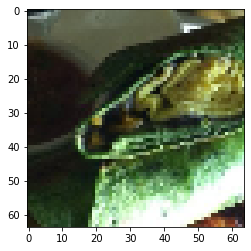

[ Index: 	                 7710 ]
[ Class: 	       grilled_salmon ]
[ Upper Class: 	                 meat ]


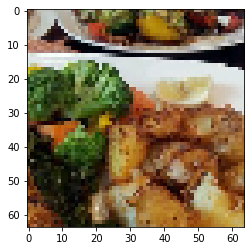

[ Index: 	                 8496 ]
[ Class: 	          peking_duck ]
[ Upper Class: 	                 meat ]


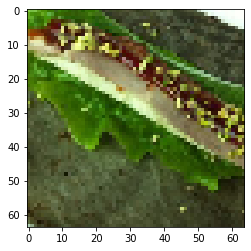

[ Index: 	                 8676 ]
[ Class: 	            ice_cream ]
[ Upper Class: 	             icecream ]


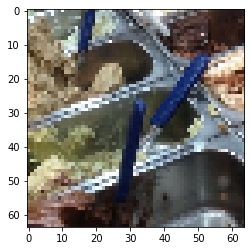

[ Index: 	                 9066 ]
[ Class: 	         caesar_salad ]
[ Upper Class: 	                salad ]


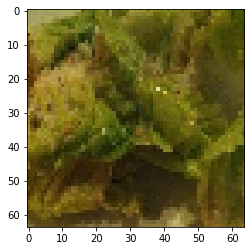

[ Index: 	                 9246 ]
[ Class: 	          panna_cotta ]
[ Upper Class: 	               desert ]


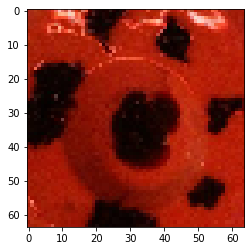

[ Index: 	                 9508 ]
[ Class: 	               paella ]
[ Upper Class: 	                  bap ]


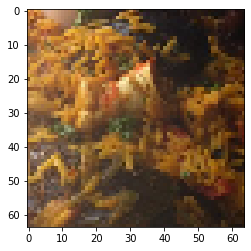

In [8]:
random_idx = np.random.choice(imgs.shape[0], 20, replace=False)
random_idx.sort()

for idx in random_idx:
    print('[ Index: \t {:>20d} ]'.format(idx))
    print('[ Class: \t {:>20s} ]'.format(class_names[idx_tokens[idx]]))
    print('[ Upper Class: \t {:>20s} ]'.format(super_class_names[upper_idx_tokens[idx]]))
    
    plt.figure()
    plt.imshow(imgs[idx, :, :, :])
    plt.show()

In [9]:
dataset = list(zip(imgs, idx_tokens))

print('Before Shuffle:\tdataset[0:10][1] = {}'.format([data[1] for data in dataset[:10]]))

np.random.shuffle(dataset)

print('After Shuffle:\tdataset[0:10][1] = {}'.format([data[1] for data in dataset[:10]]))

Before Shuffle:	dataset[0:10][1] = [33, 53, 92, 60, 70, 86, 25, 1, 43, 13]
After Shuffle:	dataset[0:10][1] = [82, 17, 93, 46, 7, 51, 41, 81, 14, 46]


In [10]:
train_dataset = dataset[:int(0.8 * len(dataset))]
test_dataset = dataset[int(0.8 * len(dataset)):]

In [11]:
batch_size = 128

train_loader = torch.utils.data.DataLoader(train_dataset,
                                         batch_size=batch_size,
                                         shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                         batch_size=batch_size,
                                         shuffle=True)

In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(4608, 1024)
        self.fc2 = nn.Linear(1024, 101)

    def forward(self, x):
        x = x.permute(0, 3, 1, 2) # (B, W, H, C) => (B, C, W, H) https://pytorch.org/docs/stable/nn.html#conv2d
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

MAX_EPOCH = 100

In [14]:
####
# https://github.com/pytorch/examples/blob/master/mnist/main.py
####

for epoch in range(MAX_EPOCH):
    
    model.train()
    for x, y in tqdm(train_loader):
        x, y = x.float().to(device), y.to(device)
        optimizer.zero_grad()
        output = model(x)
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
        
    print('Train Epoch: {:03d}/{:3d} \t Loss: {:.6f}'.format(
        epoch, MAX_EPOCH, loss.item()))
    
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for x, y in tqdm(test_loader):
            x, y = x.float().to(device), y.to(device)
            output = model(x)
            test_loss += F.nll_loss(output, y, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(y.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('Test Epoch: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


Train Epoch: 000/100 	 Loss: 4.582066



Test Epoch: Average loss: 4.6038, Accuracy: 51/2020 (2.52%)



Train Epoch: 001/100 	 Loss: 4.548616



Test Epoch: Average loss: 4.5090, Accuracy: 63/2020 (3.12%)



Train Epoch: 002/100 	 Loss: 4.529422



Test Epoch: Average loss: 4.4409, Accuracy: 75/2020 (3.71%)



Train Epoch: 003/100 	 Loss: 4.031280



Test Epoch: Average loss: 4.4156, Accuracy: 78/2020 (3.86%)



Train Epoch: 004/100 	 Loss: 4.466139



Test Epoch: Average loss: 4.3809, Accuracy: 92/2020 (4.55%)



Train Epoch: 005/100 	 Loss: 3.819648



Test Epoch: Average loss: 4.3703, Accuracy: 90/2020 (4.46%)



Train Epoch: 006/100 	 Loss: 4.283766



Test Epoch: Average loss: 4.3363, Accuracy: 121/2020 (5.99%)



Train Epoch: 007/100 	 Loss: 4.431902



Test Epoch: Average loss: 4.3226, Accuracy: 111/2020 (5.50%)



Train Epoch: 008/100 	 Loss: 3.833967



Test Epoch: Average loss: 4.3212, Accuracy: 115/2020 (5.69%)



Train Epoch: 009/100 	 Loss: 4.286118



Test Epoch: Average loss: 4.3043, Accuracy: 108/2020 (5.35%)



Train Epoch: 010/100 	 Loss: 4.082999



Test Epoch: Average loss: 4.2931, Accuracy: 116/2020 (5.74%)



Train Epoch: 011/100 	 Loss: 4.060401



Test Epoch: Average loss: 4.2908, Accuracy: 123/2020 (6.09%)



Train Epoch: 012/100 	 Loss: 4.169681



Test Epoch: Average loss: 4.2818, Accuracy: 127/2020 (6.29%)



Train Epoch: 013/100 	 Loss: 4.282941



Test Epoch: Average loss: 4.2610, Accuracy: 148/2020 (7.33%)



Train Epoch: 014/100 	 Loss: 4.384009



Test Epoch: Average loss: 4.2811, Accuracy: 128/2020 (6.34%)



Train Epoch: 015/100 	 Loss: 3.765969



Test Epoch: Average loss: 4.2615, Accuracy: 129/2020 (6.39%)



Train Epoch: 016/100 	 Loss: 4.557976



Test Epoch: Average loss: 4.2611, Accuracy: 155/2020 (7.67%)



Train Epoch: 017/100 	 Loss: 4.367995



Test Epoch: Average loss: 4.2772, Accuracy: 132/2020 (6.53%)



Train Epoch: 018/100 	 Loss: 3.817730



Test Epoch: Average loss: 4.2471, Accuracy: 131/2020 (6.49%)



Train Epoch: 019/100 	 Loss: 4.174879



Test Epoch: Average loss: 4.2570, Accuracy: 153/2020 (7.57%)


KeyboardInterrupt: 